In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
ROOTPATH = 'E:/AThesis/Final'
DATAPATH= ROOTPATH+'/training_set'
TRAINPATH = ROOTPATH+'/training_set'
TESTPATH =  ROOTPATH+'/testing_set'
MODELPATH = ROOTPATH+'/model'

In [18]:
two=glob.glob(DATAPATH+'/1.two/*.*')
five=glob.glob(DATAPATH+'/2.five/*.*')
ten=glob.glob(DATAPATH+'/3.ten/*.*')
twenty=glob.glob(DATAPATH+'/4.twenty/*.*')
fifty=glob.glob(DATAPATH+'/5.fifty/*.*')
one_hundred=glob.glob(DATAPATH+'/6.one_hundred/*.*')
two_hundred=glob.glob(DATAPATH+'/7.two_hundred/*.*')
five_hundred=glob.glob(DATAPATH+'/8.five_hundred/*.*')
one_thousand=glob.glob(DATAPATH+'/9.one_thousand/*.*')

In [19]:
print('two: ',len(two))
print('five : ',len(five))
print('ten: ',len(ten))
print('twenty: ',len(twenty))
print('fifty: ',len(fifty))
print('one_hundred: ',len(one_hundred))
print('two_hundred: ',len(two_hundred))
print('five_hundred: ',len(five_hundred))
print('one_thousand: ',len(one_thousand))

two:  600
five :  600
ten:  600
twenty:  600
fifty:  600
one_hundred:  600
two_hundred:  600
five_hundred:  600
one_thousand:  600


In [20]:
dataset_classes=[two,five,ten,twenty,fifty,one_hundred,two_hundred,five_hundred,one_thousand]
total_class=len(dataset_classes)
print('Total dataset class: ',total_class)

Total dataset class:  9


In [21]:
IMAGE_SIZE=224
BATCH_SIZE=64

#pre_processing_training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2)

training_set = train_datagen.flow_from_directory(
        DATAPATH,
        shuffle=True,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training')


validation_set = train_datagen.flow_from_directory(
        DATAPATH,
         shuffle=True,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation')

Found 4320 images belonging to 9 classes.
Found 1080 images belonging to 9 classes.


In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        TESTPATH,
         shuffle=False,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 575 images belonging to 9 classes.


In [23]:
training_set.class_indices

{'1.two': 0,
 '2.five': 1,
 '3.ten': 2,
 '4.twenty': 3,
 '5.fifty': 4,
 '6.one_hundred': 5,
 '7.two_hundred': 6,
 '8.five_hundred': 7,
 '9.one_thousand': 8}

In [24]:
validation_set.class_indices

{'1.two': 0,
 '2.five': 1,
 '3.ten': 2,
 '4.twenty': 3,
 '5.fifty': 4,
 '6.one_hundred': 5,
 '7.two_hundred': 6,
 '8.five_hundred': 7,
 '9.one_thousand': 8}

In [25]:
test_set.class_indices

{'1.two': 0,
 '2.five': 1,
 '3.ten': 2,
 '4.twenty': 3,
 '5.fifty': 4,
 '6.one_hundred': 5,
 '7.two_hundred': 6,
 '8.five_hundred': 7,
 '9.one_thousand': 8}

In [26]:
total_class=len(training_set.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  9


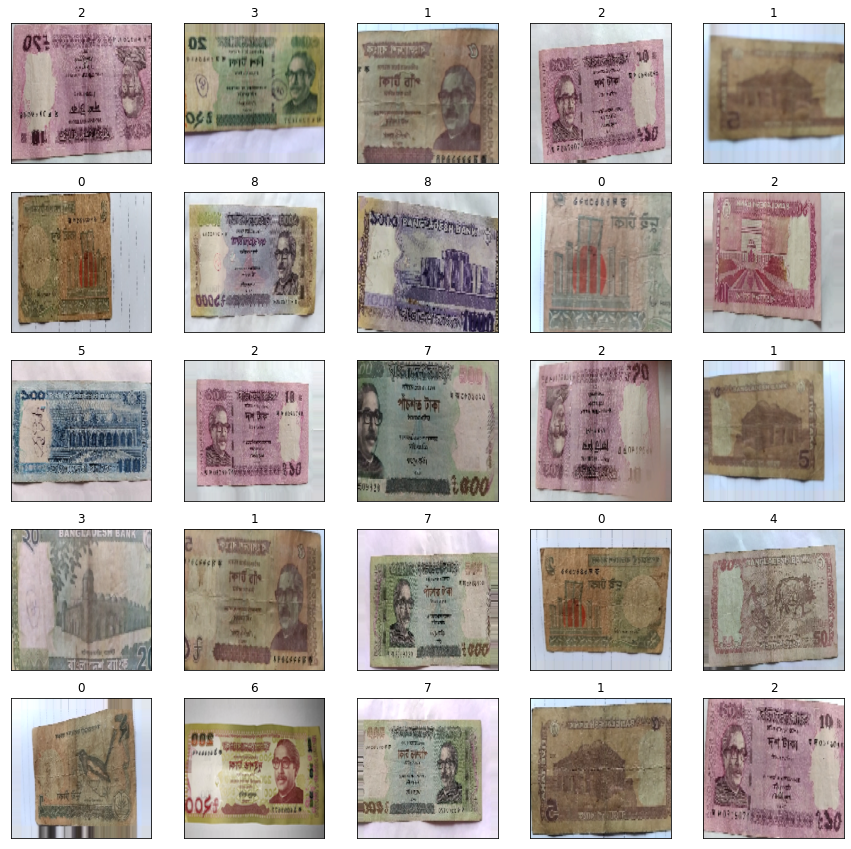

In [27]:
x,y=training_set.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

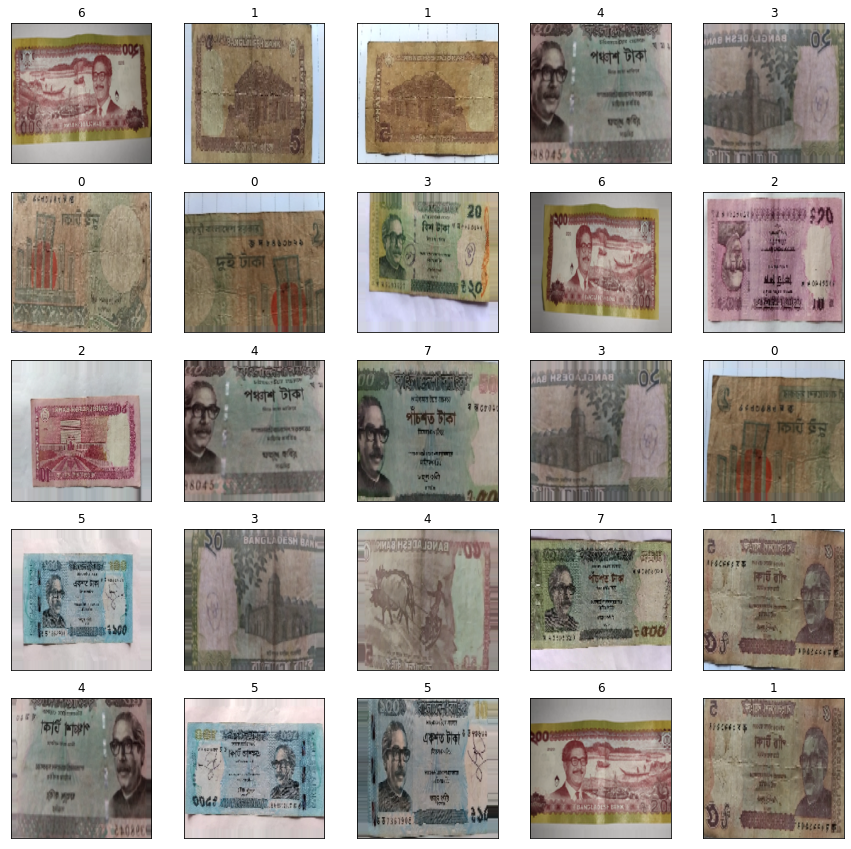

In [28]:
x,y=validation_set.next()
fig=plt.figure(figsize=(15,15))
rows=5
cols=5
for i in range(rows*cols):
    fig.add_subplot(rows,cols,i+1)
    image=x[i]
    plt.imshow(image)
    plt.title(np.argmax(y[i]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [29]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation, Dense, Flatten 

In [30]:
dense_model = Sequential()
pretrained_model=tf.keras.applications.DenseNet121(
    input_shape=(224,224,3),
    include_top=False, weights='imagenet', input_tensor=None, pooling='avg',
    classes=9
)
for layer in pretrained_model.layers:
        layer.trainable=False

dense_model.add(pretrained_model)

In [31]:
dense_model.add(Flatten())
dense_model.add(Dense(512, activation='relu'))
dense_model.add(Dense(9, activation='softmax'))

In [32]:
dense_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1024)              7037504   
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 4617      
Total params: 7,566,921
Trainable params: 529,417
Non-trainable params: 7,037,504
_________________________________________________________________


In [33]:
dense_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=MODELPATH+'DenseNet_Pretrained.model.best.hdf5', verbose=1 ,save_best_only=True)

In [35]:
history=dense_model.fit(training_set,
                epochs=50,
                validation_data=validation_set,
                callbacks=[checkpointer])

Epoch 1/50
68/68 [==============================] - ETA: 0s - loss: 0.4431 - accuracy: 0.8762
Epoch 00001: val_loss improved from inf to 0.17102, saving model to E:/AThesis/Final\modelDenseNet_Pretrained.model.best.hdf5
68/68 [==============================] - 418s 6s/step - loss: 0.4431 - accuracy: 0.8762 - val_loss: 0.1710 - val_accuracy: 0.9565
Epoch 2/50
68/68 [==============================] - ETA: 0s - loss: 0.0385 - accuracy: 0.9970
Epoch 00002: val_loss improved from 0.17102 to 0.06257, saving model to E:/AThesis/Final\modelDenseNet_Pretrained.model.best.hdf5
68/68 [==============================] - 385s 6s/step - loss: 0.0385 - accuracy: 0.9970 - val_loss: 0.0626 - val_accuracy: 0.9917
Epoch 3/50
68/68 [==============================] - ETA: 0s - loss: 0.0138 - accuracy: 1.0000
Epoch 00003: val_loss improved from 0.06257 to 0.04042, saving model to E:/AThesis/Final\modelDenseNet_Pretrained.model.best.hdf5
68/68 [==============================] - 383s 6s/step - loss: 0.0138 - a

Epoch 27/50
68/68 [==============================] - ETA: 0s - loss: 2.3877e-04 - accuracy: 1.0000
Epoch 00027: val_loss did not improve from 0.00546
68/68 [==============================] - 379s 6s/step - loss: 2.3877e-04 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 0.9981
Epoch 28/50
68/68 [==============================] - ETA: 0s - loss: 2.4283e-04 - accuracy: 1.0000
Epoch 00028: val_loss improved from 0.00546 to 0.00270, saving model to E:/AThesis/Final\modelDenseNet_Pretrained.model.best.hdf5
68/68 [==============================] - 382s 6s/step - loss: 2.4283e-04 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 29/50
68/68 [==============================] - ETA: 0s - loss: 2.9098e-04 - accuracy: 1.0000
Epoch 00029: val_loss did not improve from 0.00270
68/68 [==============================] - 379s 6s/step - loss: 2.9098e-04 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 0.9954
Epoch 30/50
68/68 [==============================] - ETA: 0s - loss: 

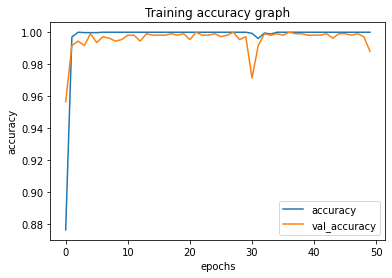

In [37]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

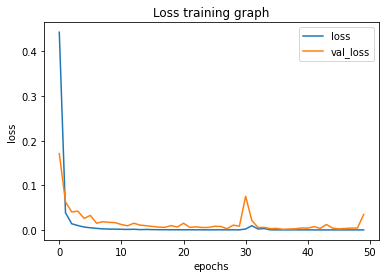

In [38]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [39]:
test_loss,test_accuracy=dense_model.evaluate(test_set)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)

9/9 [==============================] - 35s 4s/step - loss: 0.0035 - accuracy: 1.0000
Test Loss:  0.0035205199383199215
Test Accuracy:  1.0


In [40]:
print('Accuracy of the model is : ',test_accuracy*100)

Accuracy of the model is :  100.0


In [41]:
from tensorflow.keras.preprocessing import image

(1, 224, 224, 3)
[[2.9419340e-05 9.9991572e-01 1.2086747e-09 1.3582882e-06 5.3548785e-05
  1.1227678e-11 1.6146514e-09 4.3483375e-10 2.5118196e-10]]
1


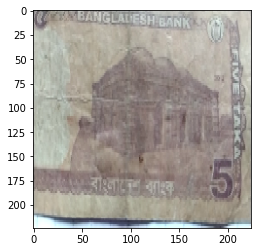

In [42]:
random_image=image.load_img('E:/AThesis/Final/testing_set/2.five/five14.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=dense_model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[5.0029114e-09 1.4292905e-07 9.9999917e-01 2.1562804e-10 9.2309477e-08
  1.0607002e-10 6.0140661e-07 3.4141446e-12 1.6590505e-08]]
2


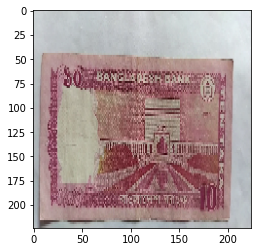

In [43]:
random_image=image.load_img('E:/AThesis/Final/testing_set/3.ten/ten46.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=dense_model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[6.3205995e-08 2.2906131e-06 2.4127056e-10 2.0375046e-09 9.9999750e-01
  4.7356255e-12 7.0464992e-08 1.8315091e-11 2.1658014e-11]]
4


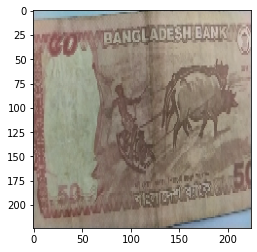

In [44]:
random_image=image.load_img('E:/AThesis/Final/testing_set/5.fifty/fifty34.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=dense_model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[2.7065005e-07 4.2188367e-07 2.1446647e-10 9.9999928e-01 4.5473232e-08
  6.8340850e-10 1.4322167e-08 7.0855349e-10 6.6174072e-10]]
3


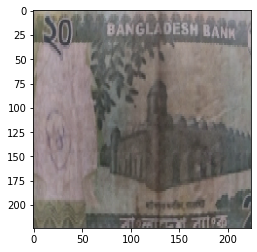

In [45]:
random_image=image.load_img('E:/AThesis/Final/testing_set/4.twenty/twenty38.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=dense_model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[1.93793537e-10 1.03217424e-07 1.39716239e-08 9.99942303e-01
  2.85579574e-07 1.71697287e-08 1.54132014e-08 5.73733487e-05
  6.34043207e-10]]
3


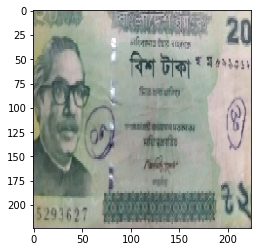

In [46]:
random_image=image.load_img('E:/AThesis/Final/testing_set/4.twenty/twenty5.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=dense_model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

(1, 224, 224, 3)
[[9.9669480e-01 3.0322149e-04 2.6144187e-03 1.3409007e-05 2.2345221e-05
  4.7768968e-05 2.0022498e-04 9.6745127e-05 7.0855244e-06]]
0


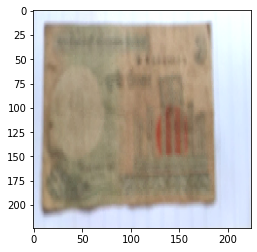

In [47]:
random_image=image.load_img('E:/AThesis/Final/testing_set/1.two/two44.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
print(test_image.shape)
predicted_class=dense_model.predict(test_image)
print(predicted_class)
#print('True classification')
print(np.argmax(predicted_class))

In [48]:
predicted_result=dense_model.predict(test_set)
predicted_result[:5]

array([[9.9999654e-01, 3.1656434e-06, 4.1575177e-10, 2.3706961e-07,
        2.6092781e-09, 5.9078381e-11, 1.5065058e-10, 3.2666307e-13,
        7.5966804e-13],
       [9.9999452e-01, 5.0356753e-06, 3.2723868e-09, 5.3277063e-07,
        6.9604766e-09, 1.4243816e-10, 7.8448012e-11, 1.9325052e-12,
        1.9743063e-13],
       [9.9999654e-01, 3.2168907e-06, 4.7411048e-09, 2.9423904e-07,
        6.5959957e-09, 1.3173905e-10, 7.1425824e-11, 6.8268118e-13,
        1.4560900e-13],
       [9.9999535e-01, 4.2816682e-06, 3.9483097e-09, 4.0181854e-07,
        6.1990053e-09, 1.0642405e-10, 8.4201202e-11, 4.8213208e-13,
        2.1098574e-13],
       [9.9999940e-01, 2.1470616e-08, 1.5068673e-09, 6.3632962e-07,
        1.6132974e-08, 5.5299192e-09, 8.0262739e-09, 9.4150285e-11,
        4.8140856e-11]], dtype=float32)

In [49]:
predicted_class=np.argmax(predicted_result,axis=-1)
predicted_class[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [50]:
test_classes=test_set.classes
test_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [51]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_classes,predicted_class)
print(cm)

[[72  0  0  0  0  0  0  0  0]
 [ 0 60  0  0  0  0  0  0  0]
 [ 0  0 60  0  0  0  0  0  0]
 [ 0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0]
 [ 0  0  0  0  0 72  0  0  0]
 [ 0  0  0  0  0  0 47  0  0]
 [ 0  0  0  0  0  0  0 72  0]
 [ 0  0  0  0  0  0  0  0 72]]


<AxesSubplot:>

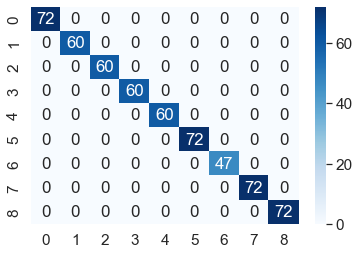

In [52]:
import seaborn as sns
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,fmt='d',cmap="Blues")

In [53]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(test_classes,predicted_class))

Accuracy score:  1.0


In [54]:
from sklearn.metrics import classification_report
print('Classification Report \n',classification_report(test_classes,predicted_class))

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        60
           5       1.00      1.00      1.00        72
           6       1.00      1.00      1.00        47
           7       1.00      1.00      1.00        72
           8       1.00      1.00      1.00        72

    accuracy                           1.00       575
   macro avg       1.00      1.00      1.00       575
weighted avg       1.00      1.00      1.00       575



In [56]:
import time
t = time.time()

export_path_keras = "Final Thesis/Saved Model/Model_10_denseNet_Pretrained{}_model_{}.h5".format(test_accuracy,int(t))
print(export_path_keras)
dense_model.save(export_path_keras)

Final Thesis/Saved Model/Model_10_denseNet_Pretrained1.0_model_1647652898.h5


In [57]:
from tensorflow.keras.models import load_model

In [58]:
model_path=export_path_keras
reload_model=load_model(model_path)
reload_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1024)              7037504   
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 4617      
Total params: 7,566,921
Trainable params: 529,417
Non-trainable params: 7,037,504
_________________________________________________________________


In [59]:
print(len(reload_model.weights))
print(reload_model.output_shape)

608
(None, 9)


In [60]:
reload_model.layers

In [61]:
t = time.time()

export_path_sm = "Final Thesis/Saved Model/Model_10_denseNet_Pretrained {} Model {}".format(test_accuracy,int(t))
print(export_path_sm)

tf.saved_model.save(dense_model, export_path_sm)

Final Thesis/Saved Model/Model_10_denseNet_Pretrained 1.0 Model 1647652928
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Final Thesis/Saved Model/Model_10_denseNet_Pretrained 1.0 Model 1647652928\assets


In [62]:
reload_tf_saved_model=tf.saved_model.load(export_path_sm)

In [63]:
reload_tf_saved_model.signatures['serving_default']

<ConcreteFunction signature_wrapper(densenet121_input) at 0x168820E9208>

In [64]:
reload_tf_saved_model

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x16841f06e80>

In [65]:
model=reload_model

In [ ]:
Model_2_SVM_with_CNN 

In [1]:
import os
import pyttsx3 
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [3]:

export_path_keras = "Final Thesis/Saved Model/4.Model_DenseNet_Pretrained.h5"

In [4]:
model_path=export_path_keras
reload_model=load_model(model_path)
reload_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1024)              7037504   
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 4617      
Total params: 7,566,921
Trainable params: 529,417
Non-trainable params: 7,037,504
_________________________________________________________________


In [5]:
def noteclass(cls):
    txt=pyttsx3.init()
    if cls==0:
        ans="Two Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==1:
        ans="Five Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==2:
        ans="Ten Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==3:
        ans="Twenty Taka"
        print(ans)
        txt.say(ans)
       # txt.runAndWait()
    elif cls==4:
        ans="Fifty Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==5:
        ans="One Hundred Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==6:
        ans="Two Hundred Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==7:
        ans="Five Hundred Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    else:
        ans="One Thousand Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    


Twenty Taka


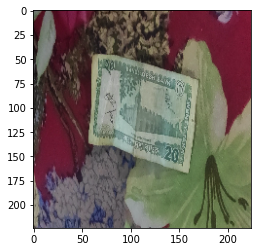

In [6]:
#""E:\AThesis\anotation\anotated img\5\new687.png"""
random_image=image.load_img('E:/AThesis/anotation/anotated img/5/new1284.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))